In [1]:
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
 
# Registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Séries Temporais

In [2]:
# Importando base de dados
base = pd.read_csv('../Dados/AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
base.shape

(144, 2)

In [9]:
# Verificando tipo dos datos e convertendo object
base.dtypes

Month          object
#Passengers     int64
dtype: object

In [3]:
# Criando parse para conversão
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

# Convertendo para tipo date
base = pd.read_csv('../Dados/AirPassengers.csv', parse_dates = ['Month'], index_col ='Month', date_parser = dateparse)

In [11]:
# Verificando os índices
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [4]:
# Tranformando de Data Frame para Series
ts = base['#Passengers']

In [13]:
# Visualização valores usando índice
ts[1]

118

In [14]:
# Visualização por ano e mês
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [5]:
# Visualização de data específica
ts[datetime(1949, 2, 1)]

118

In [16]:
# Visualização de intervalos
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [17]:
# Visualização de intervalos sem preencher a data de início
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [18]:
# Visualização por ano
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [19]:
# Valor máximo
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [20]:
# Valor mínimo
ts.index.min()

Timestamp('1949-01-01 00:00:00')

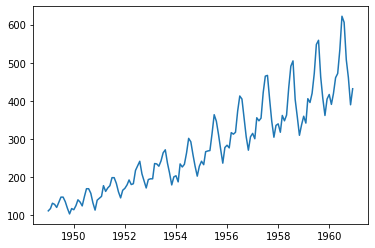

In [21]:
# Visualização da série temporal completa
plt.plot(ts)

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: #Passengers, dtype: int64

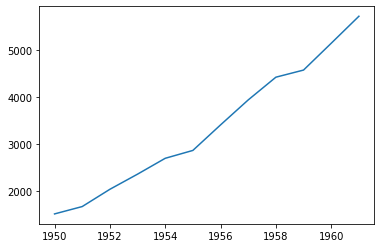

In [6]:
# Visualização por ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)
ts_ano

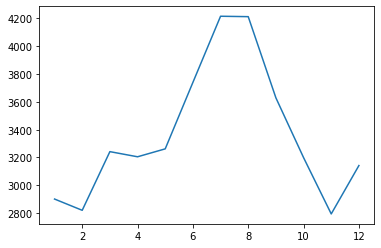

In [7]:
# Visualização por mês
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

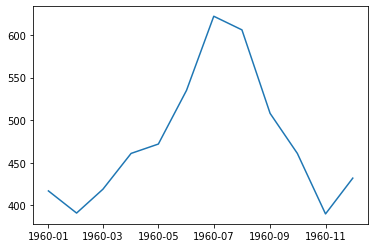

In [8]:
# Visualização entre datas específicas
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)

## Decomposição

In [9]:
# Decomposição
decomposicao = seasonal_decompose(ts)

In [10]:
# Valores com a tendencia de crescimento
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

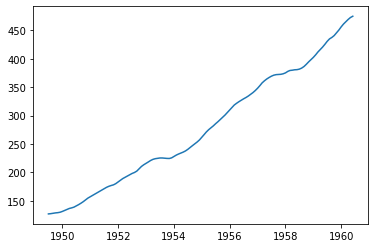

In [27]:
plt.plot(tendencia)

In [11]:
# Valores sazonal
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

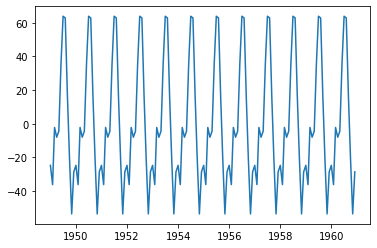

In [29]:
plt.plot(sazonal)

In [12]:
# Valores aleatórios ou residuais (erro)
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

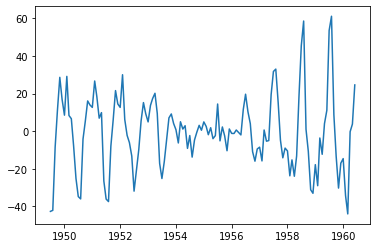

In [31]:
plt.plot(aleatorio)

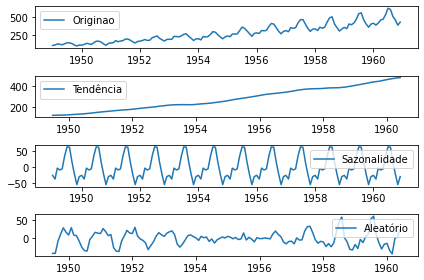

In [32]:
# Visualizando série
plt.subplot(4, 1, 1)
plt.plot(ts, label = 'Originao')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(aleatorio, label = 'Aleatório')
plt.legend(loc = 'best')
plt.tight_layout()

## Previsões

In [13]:
# Verificando média
ts.mean()

280.2986111111111

In [14]:
# Média do ultimo ano
ts['1960-01-01':'1960-12-01'].mean()

476.1666666666667

In [17]:
# Média movel
media_movel = ts.rolling(window = 12).mean()
media_movel

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Name: #Passengers, Length: 144, dtype: float64

In [18]:
ts[0:12].mean()

126.66666666666667

In [19]:
ts[1:13].mean()

126.91666666666667

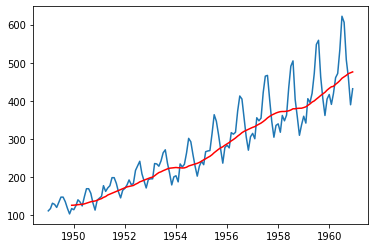

In [20]:
# Gráfico da série temporal
plt.plot(ts)
plt.plot(media_movel, color = 'red')

In [31]:
len(media_movel)

144

In [21]:
previsoes = []
for i in range(1, 13):
    superior = len(media_movel) - i
    inferior = superior - 11
    print(inferior)
    print(superior)
    print('------')
    previsoes.append(media_movel[inferior:superior].mean())

132
143
------
131
142
------
130
141
------
129
140
------
128
139
------
127
138
------
126
137
------
125
136
------
124
135
------
123
134
------
122
133
------
121
132
------


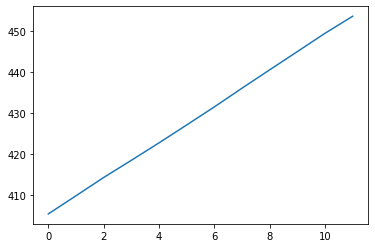

In [22]:
# Invertendo valores
previsoes = previsoes[:: -1]
plt.plot(previsoes)

In [23]:
# Previsão Usando Arima parâmetro p = 2, q = 1, d = 2, treinamento e visualização dos resultados
# Mais detalhes sobre o parâmetro freq: https://stackoverflow.com/questions/49547245/valuewarning-no-frequency-information-was-provided-so-inferred-frequency-ms-wi
modelo = ARIMA(ts, order = (2, 1, 2), freq = ts.index.inferred_freq)
modelo_treinado = modelo.fit()

In [24]:
# Verificando detalhes do modelo treinado
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.717
Date:                Sun, 01 Nov 2020   AIC                           1344.043
Time:                        17:45:42   BIC                           1361.821
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5312      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.881      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9096      0.065    -29.435      0.000      -2.037      -1.782
ma.L2.D.#Passengers     0.9995      0.068     14.774      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9553           -0.2965j            1.0003           -0.0479
MA.2            0.9553           +0.2965j            1.0003            0.0479
-----------------------------------------------------------------------------
"""

In [25]:
# Realizando previsão para 12 meses
previsoes = modelo_treinado.forecast(steps = 12)[0]
previsoes

array([433.13688948, 450.92704016, 479.86844913, 512.03934061,
       539.39050087, 555.86327915, 558.79477461, 549.30705669,
       531.67060698, 511.9015028 , 496.0288779 , 488.51593331])

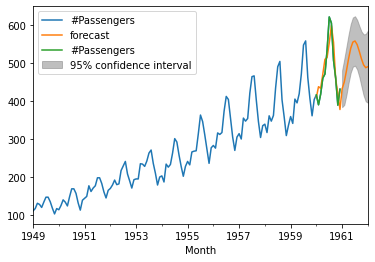

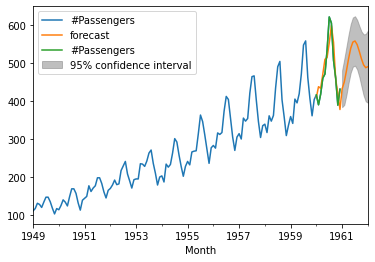

In [26]:
# Gerando gráfico de previsão série temporal completa
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1962-01-01', ax = eixo, plot_insample = True)

In [28]:
# Usando o Auto Arima para descobrir melhor conjunto de parâmetros para ARIMA
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = True)
modelo_auto.summary()
# Warning abaixo são normais, de acordo com o link abaixo
# ConvergenceWarning: Maximum... https://github.com/statsmodels/statsmodels/issues/6157

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=1.63 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.22 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.94 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.28 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.93 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.12 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.27 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.78 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.77 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.61 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.07 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.06 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sun, 01 Nov 2020   AIC                           1017.847
Time:                                     17:49:23   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.986      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.595      0.000      -1.057      -0.907
sigma2       129.3187     14.558      8.883      0.000     100.786     157.851
===================================================================================
Ljung-Box (Q):                       47.73   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.19   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# Realizando previsão com Auto Arima
proximos = modelo_auto.predict(n_periods = 12)
proximos

array([445.63562615, 420.39611581, 449.19981501, 491.84174323,
       503.39652129, 566.86469749, 654.26258813, 638.60003458,
       540.8863981 , 494.12936643, 423.33552705, 465.51045313])